# NLP Analysis of Title and Text Columns
## Amazon Health and Personal Care Reviews Dataset

This notebook performs comprehensive NLP analysis on the title and text columns including:
- Text length analysis
- Tokenization and vocabulary analysis
- Word frequency and word clouds
- Sentiment analysis
- N-gram analysis
- TF-IDF analysis
- Part-of-Speech tagging
- Readability metrics

## NLP Analysis Created: nlp_analysis.ipynb

### Key Analysis Sections:

**Text Length Analysis**

* Character and word count distributions for titles and reviews
* Comparison across rating levels
* Statistical summaries

**Tokenization & Vocabulary Analysis**

* Text preprocessing with stopword removal
* Unique vocabulary size
* Token distribution statistics

**Word Frequency & Word Clouds**

* Top 30 most common words in titles and text
* Visual word clouds for both fields
* Frequency bar charts

**Sentiment Analysis**

* Sentiment polarity using TextBlob
* Sentiment distribution and categorization
* Correlation between sentiment and ratings
* Sentiment comparison across rating levels

**N-gram Analysis**

* Bigrams and trigrams extraction
* Most common phrase patterns
* Visualization of top n-grams

**TF-IDF Analysis**

* Term frequency-inverse document frequency scoring
* Most important terms identification
* Comparison between titles and review text

**Part-of-Speech (POS) Tagging**

* POS distribution analysis
* Most common nouns and adjectives
* Linguistic pattern identification

**Readability Metrics**
* Flesch Reading Ease scores
* Flesch-Kincaid Grade Level
* Gunning Fog Index
* SMOG Index
* Readability by rating comparison

**Summary & Key Insights**
* Comprehensive overview of all findings


Note: The analysis uses a sample of 50,000 reviews for most computations to balance thoroughness with performance.

In [1]:
# Install required packages
%pip install datasets==3.6.0 seaborn wordcloud textblob nltk scikit-learn textstat spacy

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached typing_inspection-0.4.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 8.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 10.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------- ----------------------------- 2.4/8.7 MB 11.7 MB/s eta 0:00:01
   ---------------------- ----------------- 5.0/8.7 MB 11.8 MB/s eta 0:00:01
   ---------------------------------- ----- 7.6/8.7 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 11.2 MB/s

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset
import warnings
warnings.filterwarnings('ignore')

# NLP libraries
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import ngrams, pos_tag
from collections import Counter
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import textstat
import re

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

c:\Users\Mitsy\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mitsy\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mitsy\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Mitsy\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mitsy\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Mitsy\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping token

In [3]:
# Load dataset
print("Loading dataset...")
data = load_dataset(
    "McAuley-Lab/Amazon-Reviews-2023", 
    "raw_review_Health_and_Personal_Care",
    split="full", 
    trust_remote_code=True
)
df = data.to_pandas()
print(f"Dataset loaded: {df.shape[0]} reviews")
print(f"\nColumns: {list(df.columns)}")

Loading dataset...
Dataset loaded: 494121 reviews

Columns: ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase']


## 1. Text Length Analysis

In [4]:
# Calculate text lengths
df['title_length'] = df['title'].astype(str).apply(len)
df['text_length'] = df['text'].astype(str).apply(len)
df['title_word_count'] = df['title'].astype(str).apply(lambda x: len(x.split()))
df['text_word_count'] = df['text'].astype(str).apply(lambda x: len(x.split()))

print("=== TEXT LENGTH STATISTICS ===")
print("\nTitle Length (characters):")
print(df['title_length'].describe())
print("\nText Length (characters):")
print(df['text_length'].describe())
print("\nTitle Word Count:")
print(df['title_word_count'].describe())
print("\nText Word Count:")
print(df['text_word_count'].describe())

=== TEXT LENGTH STATISTICS ===

Title Length (characters):
count    494121.000000
mean         22.408434
std          17.373742
min           1.000000
25%          10.000000
50%          16.000000
75%          29.000000
max         287.000000
Name: title_length, dtype: float64

Text Length (characters):
count    494121.000000
mean        188.232364
std         284.930820
min           0.000000
25%          45.000000
50%         107.000000
75%         225.000000
max       19956.000000
Name: text_length, dtype: float64

Title Word Count:
count    494121.000000
mean          4.128513
std           3.322934
min           1.000000
25%           2.000000
50%           3.000000
75%           5.000000
max          55.000000
Name: title_word_count, dtype: float64

Text Word Count:
count    494121.000000
mean         35.248407
std          52.210063
min           0.000000
25%           8.000000
50%          20.000000
75%          43.000000
max        3455.000000
Name: text_word_count, dtype: flo

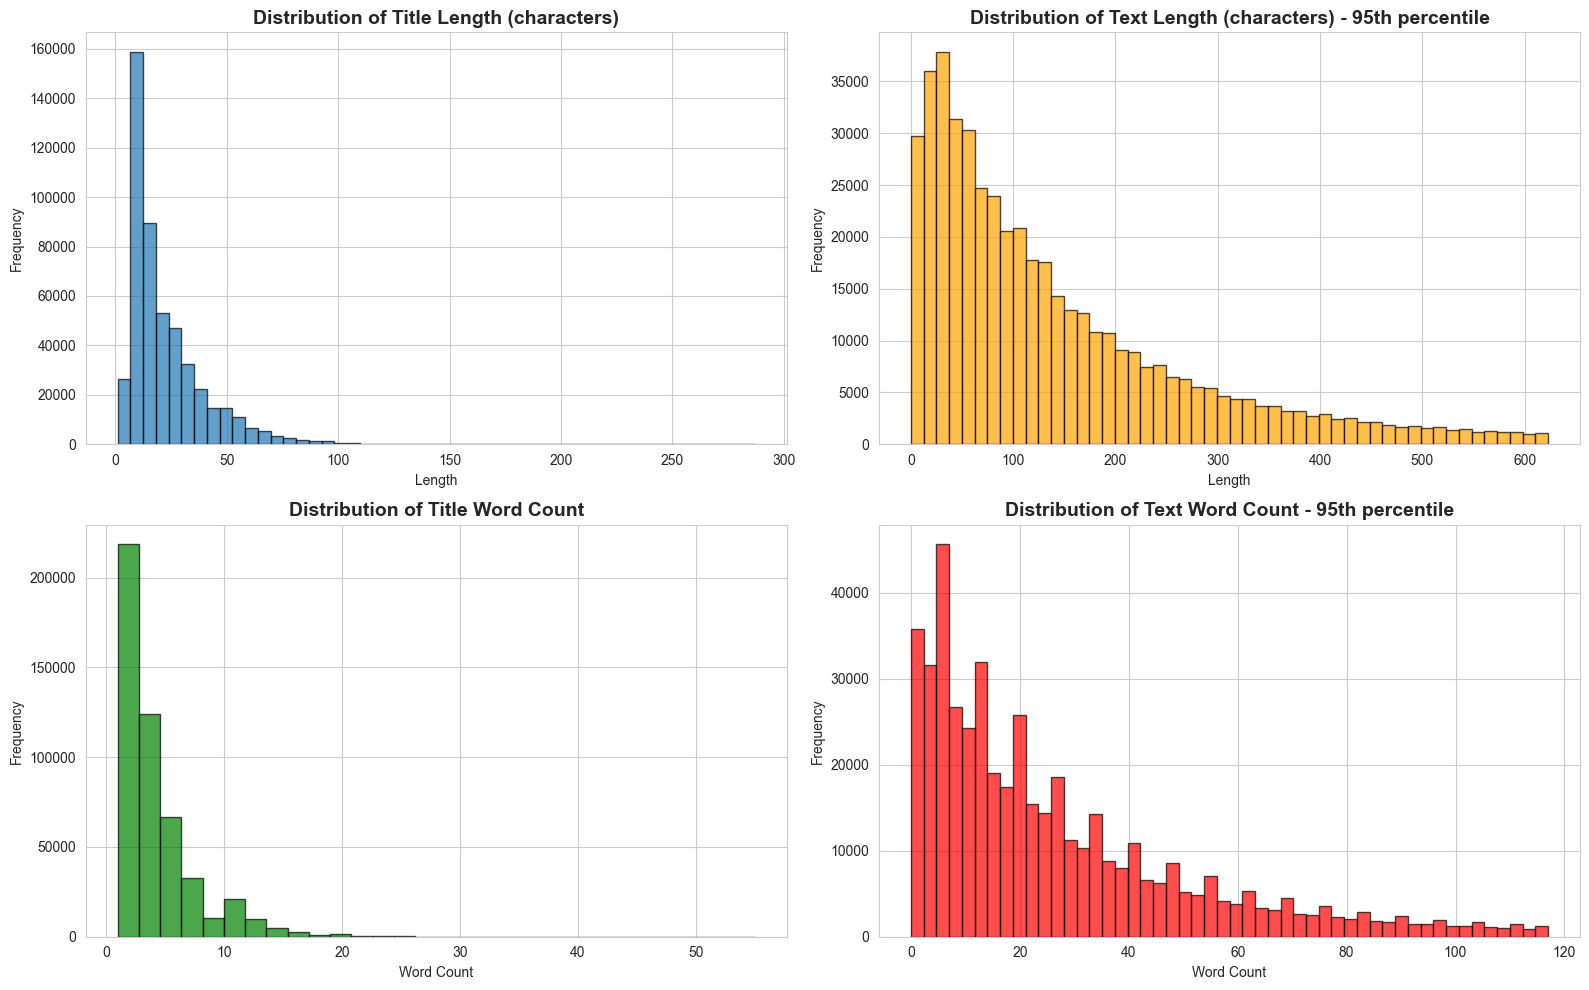

In [5]:
# Visualize text length distributions
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Title character length
axes[0, 0].hist(df['title_length'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Title Length (characters)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Length')
axes[0, 0].set_ylabel('Frequency')

# Text character length (capped at 95th percentile for better visualization)
text_length_cap = df['text_length'].quantile(0.95)
axes[0, 1].hist(df[df['text_length'] <= text_length_cap]['text_length'], 
                bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_title('Distribution of Text Length (characters) - 95th percentile', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Length')
axes[0, 1].set_ylabel('Frequency')

# Title word count
axes[1, 0].hist(df['title_word_count'], bins=30, edgecolor='black', alpha=0.7, color='green')
axes[1, 0].set_title('Distribution of Title Word Count', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Word Count')
axes[1, 0].set_ylabel('Frequency')

# Text word count (capped at 95th percentile)
text_word_cap = df['text_word_count'].quantile(0.95)
axes[1, 1].hist(df[df['text_word_count'] <= text_word_cap]['text_word_count'], 
                bins=50, edgecolor='black', alpha=0.7, color='red')
axes[1, 1].set_title('Distribution of Text Word Count - 95th percentile', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Word Count')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

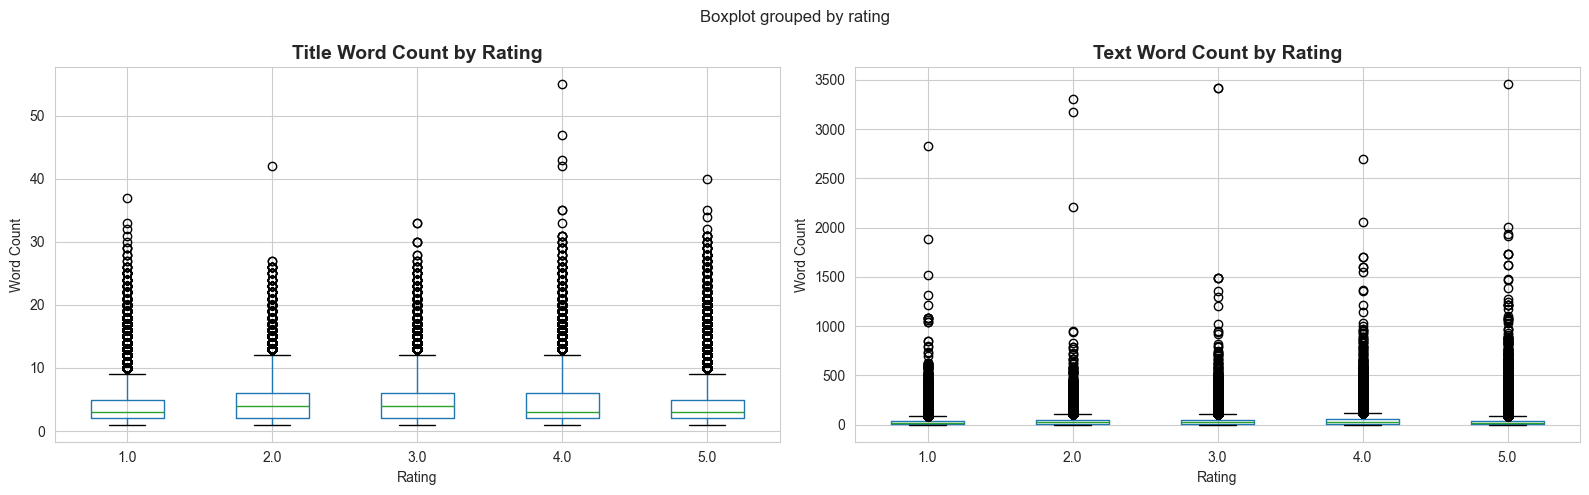

In [6]:
# Text length by rating
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

df.boxplot(column='title_word_count', by='rating', ax=axes[0])
axes[0].set_title('Title Word Count by Rating', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Word Count')
plt.sca(axes[0])
plt.xticks(rotation=0)

df.boxplot(column='text_word_count', by='rating', ax=axes[1])
axes[1].set_title('Text Word Count by Rating', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Word Count')
plt.sca(axes[1])
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

## 2. Tokenization and Vocabulary Analysis

In [7]:
# Sample subset for detailed analysis (to speed up processing)
sample_size = min(50000, len(df))
df_sample = df.sample(n=sample_size, random_state=42)
print(f"Working with sample of {sample_size} reviews")

Working with sample of 50000 reviews


In [8]:
# Tokenization function
def preprocess_text(text):
    """Clean and tokenize text"""
    text = str(text).lower()
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return tokens

print("Tokenizing titles...")
df_sample['title_tokens'] = df_sample['title'].apply(preprocess_text)

print("Tokenizing text...")
df_sample['text_tokens'] = df_sample['text'].apply(preprocess_text)

print("Tokenization complete!")

Tokenizing titles...
Tokenizing text...
Tokenization complete!


In [9]:
# Vocabulary statistics
all_title_tokens = [token for tokens in df_sample['title_tokens'] for token in tokens]
all_text_tokens = [token for tokens in df_sample['text_tokens'] for token in tokens]

print("=== VOCABULARY STATISTICS ===")
print(f"\nTotal tokens in titles: {len(all_title_tokens):,}")
print(f"Unique tokens in titles: {len(set(all_title_tokens)):,}")
print(f"\nTotal tokens in text: {len(all_text_tokens):,}")
print(f"Unique tokens in text: {len(set(all_text_tokens)):,}")

# Average tokens per review
avg_title_tokens = df_sample['title_tokens'].apply(len).mean()
avg_text_tokens = df_sample['text_tokens'].apply(len).mean()
print(f"\nAverage tokens per title: {avg_title_tokens:.2f}")
print(f"Average tokens per text: {avg_text_tokens:.2f}")

=== VOCABULARY STATISTICS ===

Total tokens in titles: 133,407
Unique tokens in titles: 11,254

Total tokens in text: 873,201
Unique tokens in text: 37,366

Average tokens per title: 2.67
Average tokens per text: 17.46


## 3. Word Frequency Analysis and Word Clouds

In [10]:
# Most common words in titles
title_word_freq = Counter(all_title_tokens)
top_30_title = title_word_freq.most_common(30)

print("=== TOP 30 WORDS IN TITLES ===")
for word, count in top_30_title:
    print(f"{word:20s}: {count:6,}")

=== TOP 30 WORDS IN TITLES ===
great               :  6,177
stars               :  6,049
five                :  4,387
good                :  3,636
product             :  3,244
works               :  2,325
love                :  1,596
one                 :  1,108
work                :  1,095
quality             :  1,066
best                :  1,055
perfect             :    994
like                :    977
use                 :    976
nice                :    953
well                :    904
buy                 :    884
easy                :    864
four                :    794
price               :    767
dont                :    739
star                :    681
money               :    624
really              :    593
excellent           :    584
three               :    564
better              :    544
amazing             :    516
doesnt              :    511
worth               :    496


In [11]:
# Most common words in text
text_word_freq = Counter(all_text_tokens)
top_30_text = text_word_freq.most_common(30)

print("=== TOP 30 WORDS IN TEXT ===")
for word, count in top_30_text:
    print(f"{word:20s}: {count:6,}")

=== TOP 30 WORDS IN TEXT ===
product             : 10,410
great               : 10,344
use                 :  8,233
like                :  7,760
good                :  7,345
one                 :  7,017
well                :  5,760
love                :  5,489
would               :  5,236
get                 :  5,033
works               :  4,995
really              :  4,631
work                :  4,466
used                :  4,153
time                :  4,113
dont                :  3,973
easy                :  3,650
much                :  3,479
little              :  3,237
using               :  3,208
also                :  3,195
better              :  2,882
ive                 :  2,851
price               :  2,757
back                :  2,705
bought              :  2,677
even                :  2,630
recommend           :  2,574
nice                :  2,562
hair                :  2,431


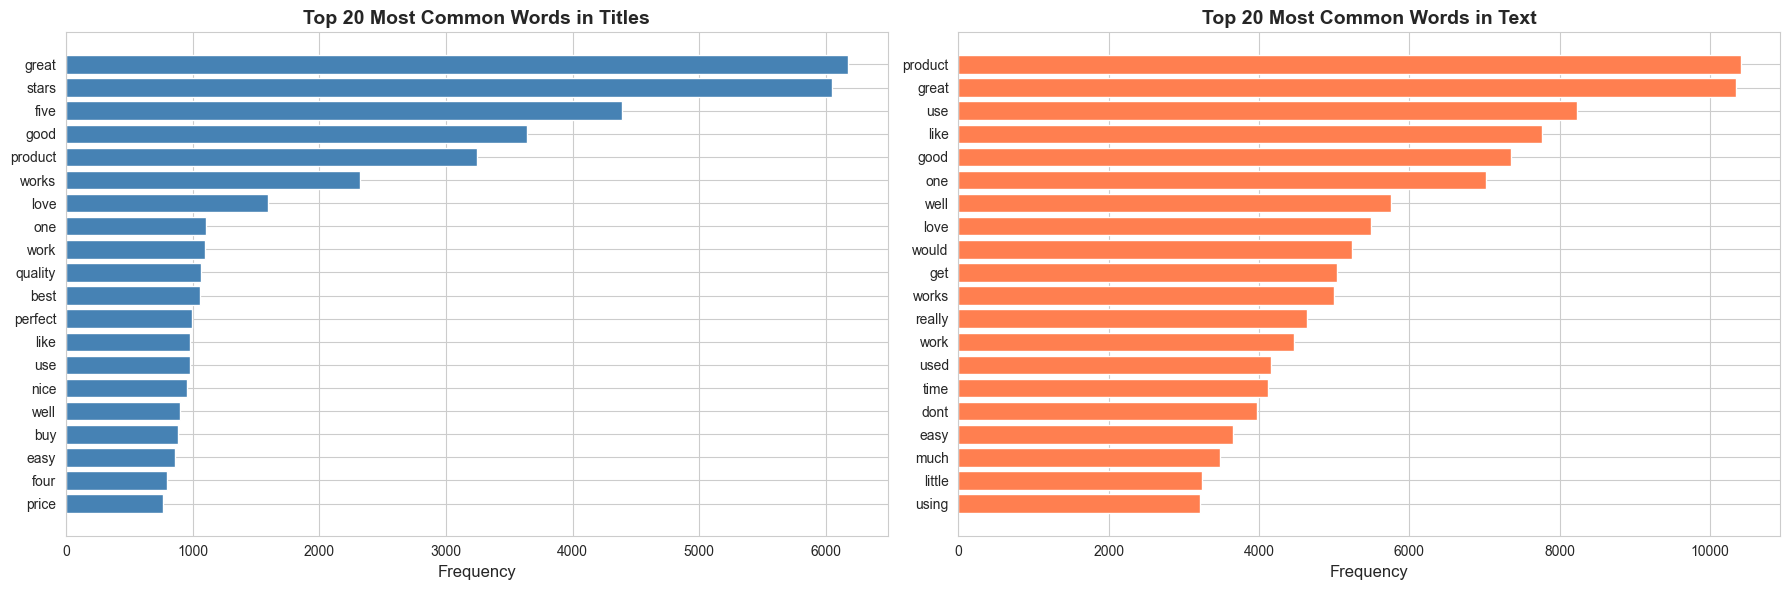

In [12]:
# Visualize top words
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Top 20 title words
top_20_title = title_word_freq.most_common(20)
words, counts = zip(*top_20_title)
axes[0].barh(range(len(words)), counts, color='steelblue')
axes[0].set_yticks(range(len(words)))
axes[0].set_yticklabels(words)
axes[0].invert_yaxis()
axes[0].set_xlabel('Frequency', fontsize=12)
axes[0].set_title('Top 20 Most Common Words in Titles', fontsize=14, fontweight='bold')

# Top 20 text words
top_20_text = text_word_freq.most_common(20)
words, counts = zip(*top_20_text)
axes[1].barh(range(len(words)), counts, color='coral')
axes[1].set_yticks(range(len(words)))
axes[1].set_yticklabels(words)
axes[1].invert_yaxis()
axes[1].set_xlabel('Frequency', fontsize=12)
axes[1].set_title('Top 20 Most Common Words in Text', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

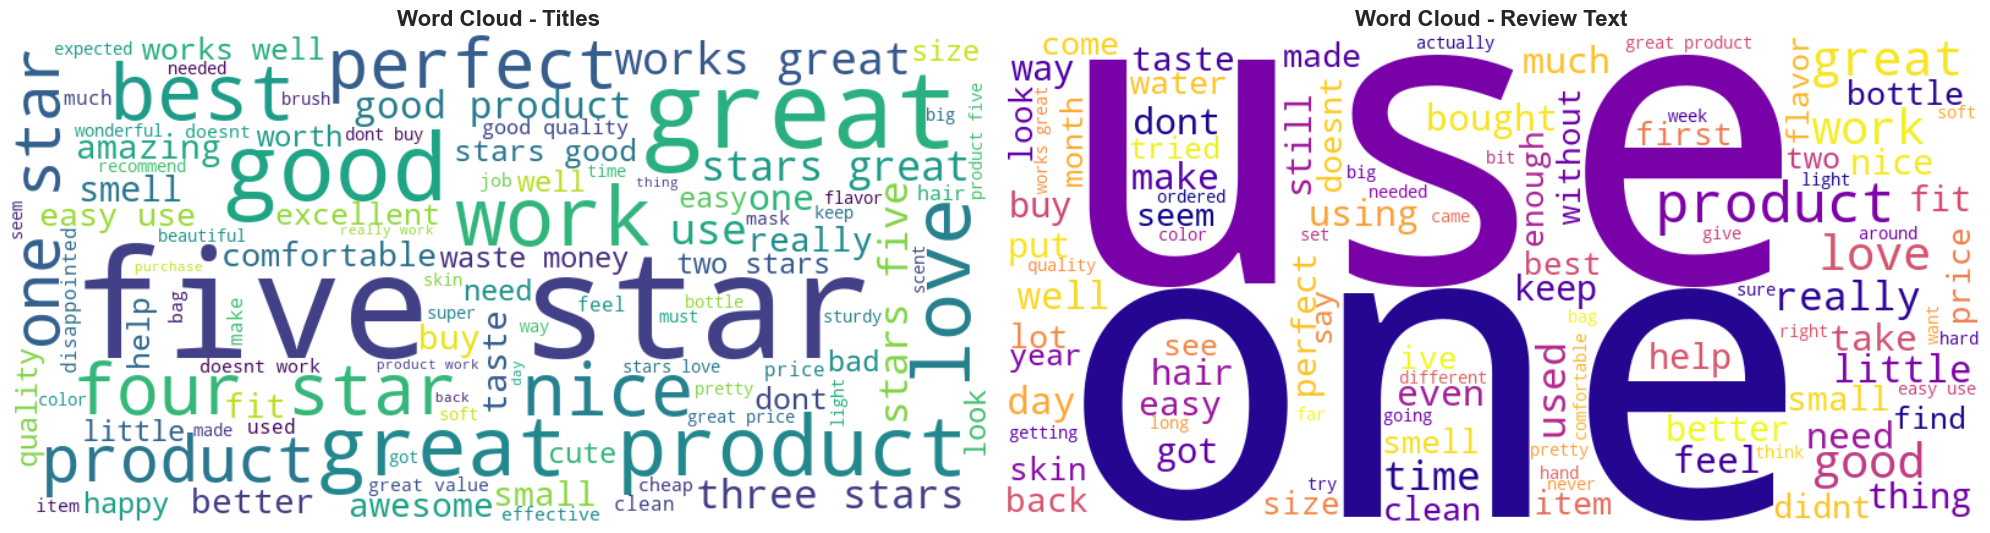

In [13]:
# Word clouds
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Title word cloud
title_text = ' '.join(all_title_tokens)
wordcloud_title = WordCloud(width=800, height=400, 
                            background_color='white',
                            colormap='viridis',
                            max_words=100).generate(title_text)
axes[0].imshow(wordcloud_title, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Word Cloud - Titles', fontsize=16, fontweight='bold')

# Text word cloud
text_text = ' '.join(all_text_tokens[:100000])  # Limit for performance
wordcloud_text = WordCloud(width=800, height=400, 
                          background_color='white',
                          colormap='plasma',
                          max_words=100).generate(text_text)
axes[1].imshow(wordcloud_text, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Word Cloud - Review Text', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

## 4. Sentiment Analysis

In [14]:
# Sentiment analysis using TextBlob
print("Performing sentiment analysis on titles...")
df_sample['title_sentiment'] = df_sample['title'].astype(str).apply(
    lambda x: TextBlob(x).sentiment.polarity
)

print("Performing sentiment analysis on text...")
df_sample['text_sentiment'] = df_sample['text'].astype(str).apply(
    lambda x: TextBlob(x).sentiment.polarity
)

print("\n=== SENTIMENT STATISTICS ===")
print("\nTitle Sentiment (polarity):")
print(df_sample['title_sentiment'].describe())
print("\nText Sentiment (polarity):")
print(df_sample['text_sentiment'].describe())

Performing sentiment analysis on titles...
Performing sentiment analysis on text...

=== SENTIMENT STATISTICS ===

Title Sentiment (polarity):
count    50000.000000
mean         0.257453
std          0.409148
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.600000
max          1.000000
Name: title_sentiment, dtype: float64

Text Sentiment (polarity):
count    50000.000000
mean         0.257624
std          0.329824
min         -1.000000
25%          0.000000
50%          0.222222
75%          0.470000
max          1.000000
Name: text_sentiment, dtype: float64


In [15]:
# Categorize sentiment
def categorize_sentiment(polarity):
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df_sample['title_sentiment_category'] = df_sample['title_sentiment'].apply(categorize_sentiment)
df_sample['text_sentiment_category'] = df_sample['text_sentiment'].apply(categorize_sentiment)

print("\nTitle Sentiment Distribution:")
print(df_sample['title_sentiment_category'].value_counts())
print("\nText Sentiment Distribution:")
print(df_sample['text_sentiment_category'].value_counts())


Title Sentiment Distribution:
title_sentiment_category
Positive    23445
Neutral     22378
Negative     4177
Name: count, dtype: int64

Text Sentiment Distribution:
text_sentiment_category
Positive    32750
Neutral     12896
Negative     4354
Name: count, dtype: int64


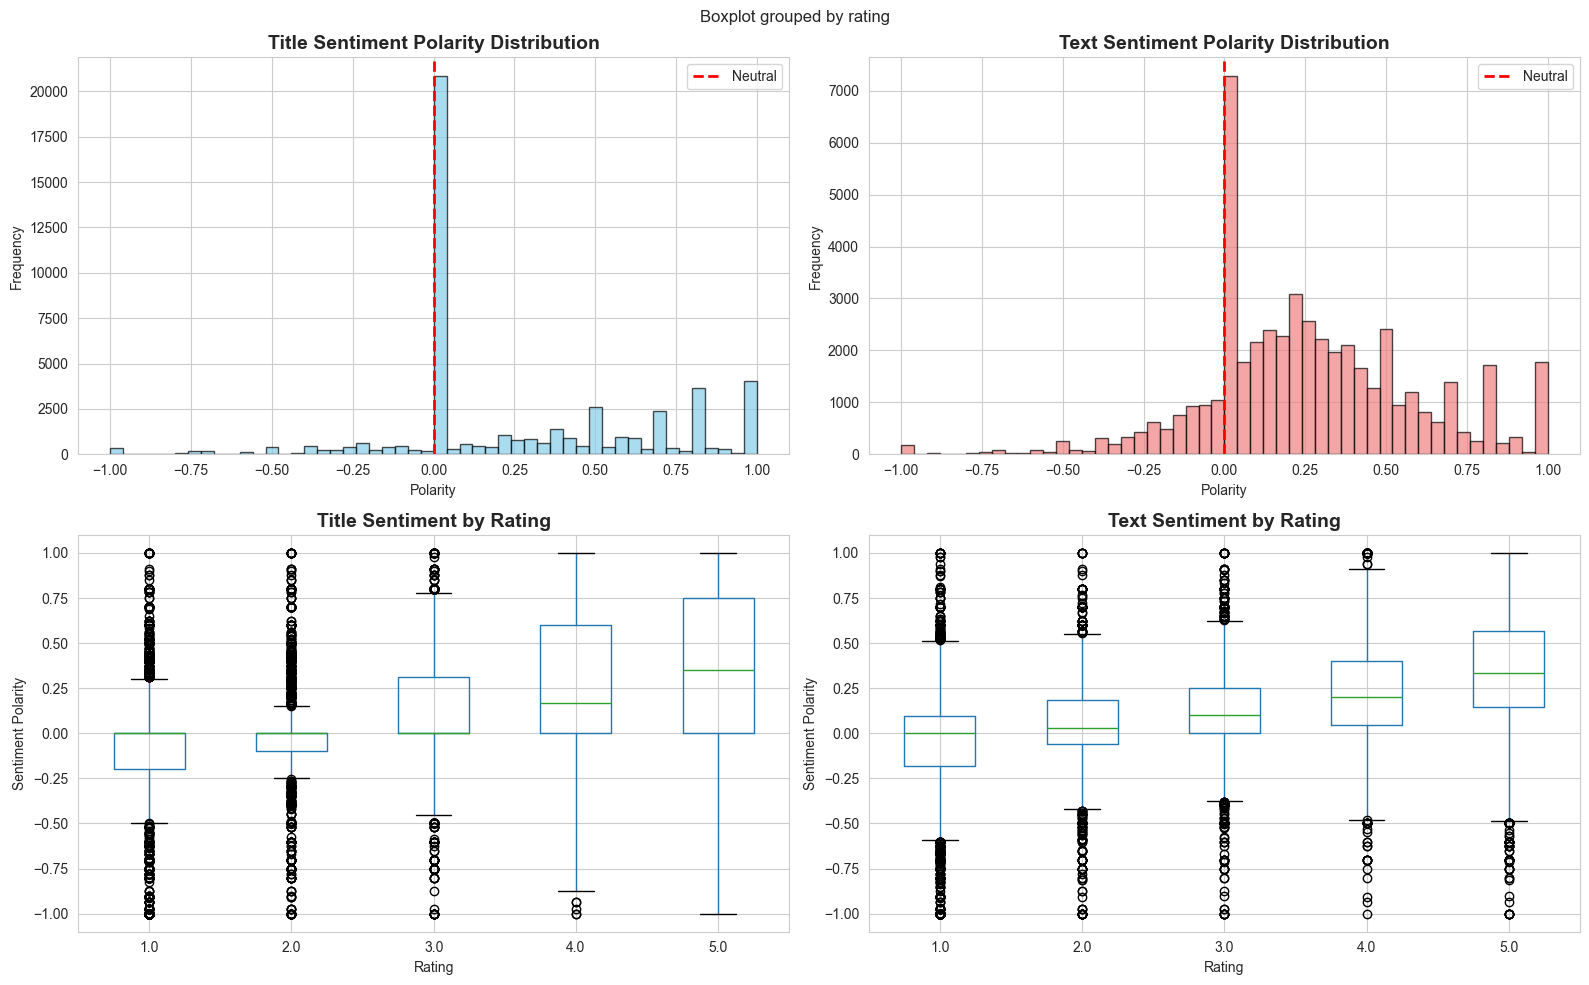

In [16]:
# Visualize sentiment
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Title sentiment distribution
axes[0, 0].hist(df_sample['title_sentiment'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Neutral')
axes[0, 0].set_title('Title Sentiment Polarity Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Polarity')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

# Text sentiment distribution
axes[0, 1].hist(df_sample['text_sentiment'], bins=50, edgecolor='black', alpha=0.7, color='lightcoral')
axes[0, 1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Neutral')
axes[0, 1].set_title('Text Sentiment Polarity Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Polarity')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

# Sentiment by rating - Title
df_sample.boxplot(column='title_sentiment', by='rating', ax=axes[1, 0])
axes[1, 0].set_title('Title Sentiment by Rating', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Rating')
axes[1, 0].set_ylabel('Sentiment Polarity')

# Sentiment by rating - Text
df_sample.boxplot(column='text_sentiment', by='rating', ax=axes[1, 1])
axes[1, 1].set_title('Text Sentiment by Rating', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Rating')
axes[1, 1].set_ylabel('Sentiment Polarity')

plt.tight_layout()
plt.show()

In [17]:
# Correlation between sentiment and rating
corr_title = df_sample['title_sentiment'].corr(df_sample['rating'])
corr_text = df_sample['text_sentiment'].corr(df_sample['rating'])

print(f"Correlation between title sentiment and rating: {corr_title:.4f}")
print(f"Correlation between text sentiment and rating: {corr_text:.4f}")

Correlation between title sentiment and rating: 0.4367
Correlation between text sentiment and rating: 0.4763


## 5. N-gram Analysis

In [18]:
# Extract bigrams and trigrams
def get_ngrams(tokens_list, n):
    """Extract n-grams from list of tokens"""
    all_ngrams = []
    for tokens in tokens_list:
        if len(tokens) >= n:
            all_ngrams.extend(list(ngrams(tokens, n)))
    return all_ngrams

print("Extracting bigrams from titles...")
title_bigrams = get_ngrams(df_sample['title_tokens'].tolist(), 2)

print("Extracting trigrams from titles...")
title_trigrams = get_ngrams(df_sample['title_tokens'].tolist(), 3)

print("Extracting bigrams from text...")
text_bigrams = get_ngrams(df_sample['text_tokens'].tolist(), 2)

print("Extracting trigrams from text...")
text_trigrams = get_ngrams(df_sample['text_tokens'].tolist(), 3)

print("N-gram extraction complete!")

Extracting bigrams from titles...
Extracting trigrams from titles...
Extracting bigrams from text...
Extracting trigrams from text...
N-gram extraction complete!


In [19]:
# Most common bigrams in titles
title_bigram_freq = Counter(title_bigrams)
print("=== TOP 20 BIGRAMS IN TITLES ===")
for bigram, count in title_bigram_freq.most_common(20):
    print(f"{' '.join(bigram):40s}: {count:6,}")

=== TOP 20 BIGRAMS IN TITLES ===
five stars                              :  4,374
great product                           :  1,103
four stars                              :    780
one star                                :    646
works great                             :    577
three stars                             :    534
good product                            :    498
easy use                                :    379
works well                              :    314
waste money                             :    305
two stars                               :    280
good quality                            :    248
great value                             :    208
doesnt work                             :    205
great price                             :    189
dont buy                                :    158
dont waste                              :    137
great quality                           :    137
good value                              :    136
excellent product                   

In [20]:
# Most common trigrams in titles
title_trigram_freq = Counter(title_trigrams)
print("=== TOP 20 TRIGRAMS IN TITLES ===")
for trigram, count in title_trigram_freq.most_common(20):
    print(f"{' '.join(trigram):50s}: {count:6,}")

=== TOP 20 TRIGRAMS IN TITLES ===
dont waste money                                  :    120
great product great                               :     36
gets job done                                     :     33
product great price                               :     28
love love love                                    :     26
works like charm                                  :     25
worth every penny                                 :     24
ive ever used                                     :     23
great product price                               :     20
great customer service                            :     18
works really well                                 :     17
yoga mat cleaner                                  :     16
good product good                                 :     15
product good price                                :     15
doesnt work well                                  :     14
product works great                               :     13
first aid kit         

In [21]:
# Most common bigrams in text
text_bigram_freq = Counter(text_bigrams)
print("=== TOP 20 BIGRAMS IN TEXT ===")
for bigram, count in text_bigram_freq.most_common(20):
    print(f"{' '.join(bigram):40s}: {count:6,}")

=== TOP 20 BIGRAMS IN TEXT ===
great product                           :  1,265
works great                             :  1,238
easy use                                :  1,123
works well                              :    851
highly recommend                        :    762
would recommend                         :    620
waste money                             :    563
good quality                            :    520
good product                            :    508
work well                               :    502
much better                             :    487
first time                              :    403
really like                             :    396
love product                            :    386
great price                             :    376
long time                               :    375
well made                               :    368
dont know                               :    359
ive used                                :    357
feel like                             

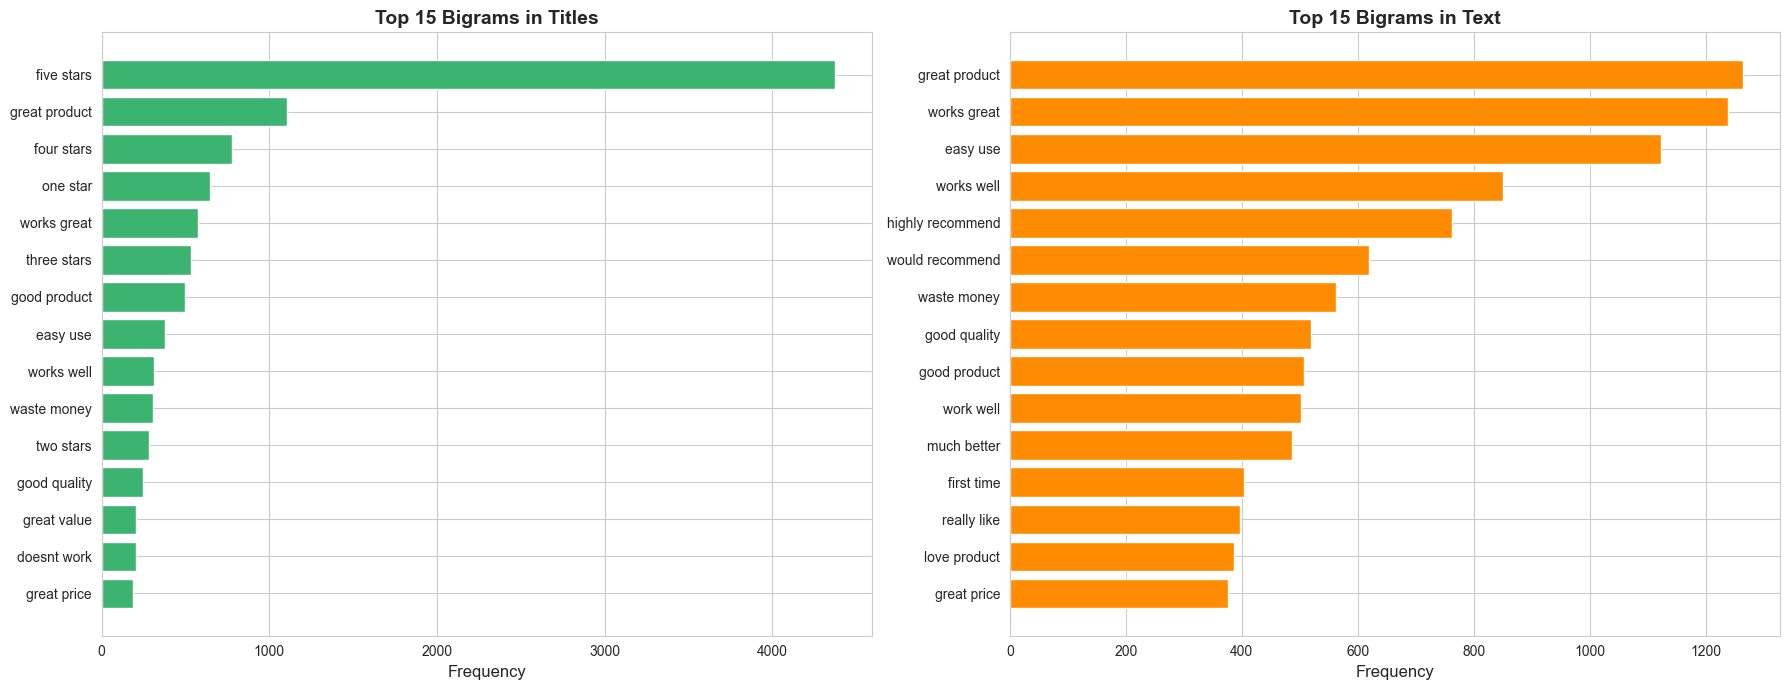

In [22]:
# Visualize top bigrams
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Title bigrams
top_15_title_bigrams = title_bigram_freq.most_common(15)
bigrams_str = [' '.join(bg) for bg, _ in top_15_title_bigrams]
counts = [count for _, count in top_15_title_bigrams]
axes[0].barh(range(len(bigrams_str)), counts, color='mediumseagreen')
axes[0].set_yticks(range(len(bigrams_str)))
axes[0].set_yticklabels(bigrams_str)
axes[0].invert_yaxis()
axes[0].set_xlabel('Frequency', fontsize=12)
axes[0].set_title('Top 15 Bigrams in Titles', fontsize=14, fontweight='bold')

# Text bigrams
top_15_text_bigrams = text_bigram_freq.most_common(15)
bigrams_str = [' '.join(bg) for bg, _ in top_15_text_bigrams]
counts = [count for _, count in top_15_text_bigrams]
axes[1].barh(range(len(bigrams_str)), counts, color='darkorange')
axes[1].set_yticks(range(len(bigrams_str)))
axes[1].set_yticklabels(bigrams_str)
axes[1].invert_yaxis()
axes[1].set_xlabel('Frequency', fontsize=12)
axes[1].set_title('Top 15 Bigrams in Text', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 6. TF-IDF Analysis

In [23]:
# TF-IDF for titles
print("Calculating TF-IDF for titles...")
tfidf_title = TfidfVectorizer(max_features=100, stop_words='english', min_df=5)
tfidf_title_matrix = tfidf_title.fit_transform(df_sample['title'].astype(str))

# Get feature names and their average TF-IDF scores
feature_names_title = tfidf_title.get_feature_names_out()
avg_tfidf_title = tfidf_title_matrix.mean(axis=0).A1
title_tfidf_df = pd.DataFrame({
    'word': feature_names_title,
    'tfidf': avg_tfidf_title
}).sort_values('tfidf', ascending=False)

print("\n=== TOP 20 WORDS BY TF-IDF IN TITLES ===")
print(title_tfidf_df.head(20))

Calculating TF-IDF for titles...

=== TOP 20 WORDS BY TF-IDF IN TITLES ===
         word     tfidf
80      stars  0.120604
37      great  0.082493
35       good  0.051091
66    product  0.043265
98      works  0.036146
52       love  0.026780
5        best  0.017193
62    perfect  0.017045
95       work  0.015538
58       nice  0.015532
68    quality  0.015152
10        buy  0.014428
87        use  0.014208
49       like  0.014160
79       star  0.013501
22       easy  0.012999
65      price  0.010835
25  excellent  0.009738
21        don  0.009567
19       does  0.009474


In [24]:
# TF-IDF for text
print("Calculating TF-IDF for text...")
tfidf_text = TfidfVectorizer(max_features=100, stop_words='english', min_df=5)
tfidf_text_matrix = tfidf_text.fit_transform(df_sample['text'].astype(str))

# Get feature names and their average TF-IDF scores
feature_names_text = tfidf_text.get_feature_names_out()
avg_tfidf_text = tfidf_text_matrix.mean(axis=0).A1
text_tfidf_df = pd.DataFrame({
    'word': feature_names_text,
    'tfidf': avg_tfidf_text
}).sort_values('tfidf', ascending=False)

print("\n=== TOP 20 WORDS BY TF-IDF IN TEXT ===")
print(text_tfidf_df.head(20))

Calculating TF-IDF for text...

=== TOP 20 WORDS BY TF-IDF IN TEXT ===
       word     tfidf
34    great  0.079704
65  product  0.067054
32     good  0.055817
88      use  0.049394
50     love  0.046824
97    works  0.045317
44     like  0.044290
10       br  0.043104
41     just  0.036374
95     work  0.032922
69   really  0.029447
25     easy  0.029206
89     used  0.027610
85     time  0.025971
22     does  0.023916
24      don  0.022892
62  perfect  0.022537
57     nice  0.022229
64    price  0.021882
68  quality  0.021572


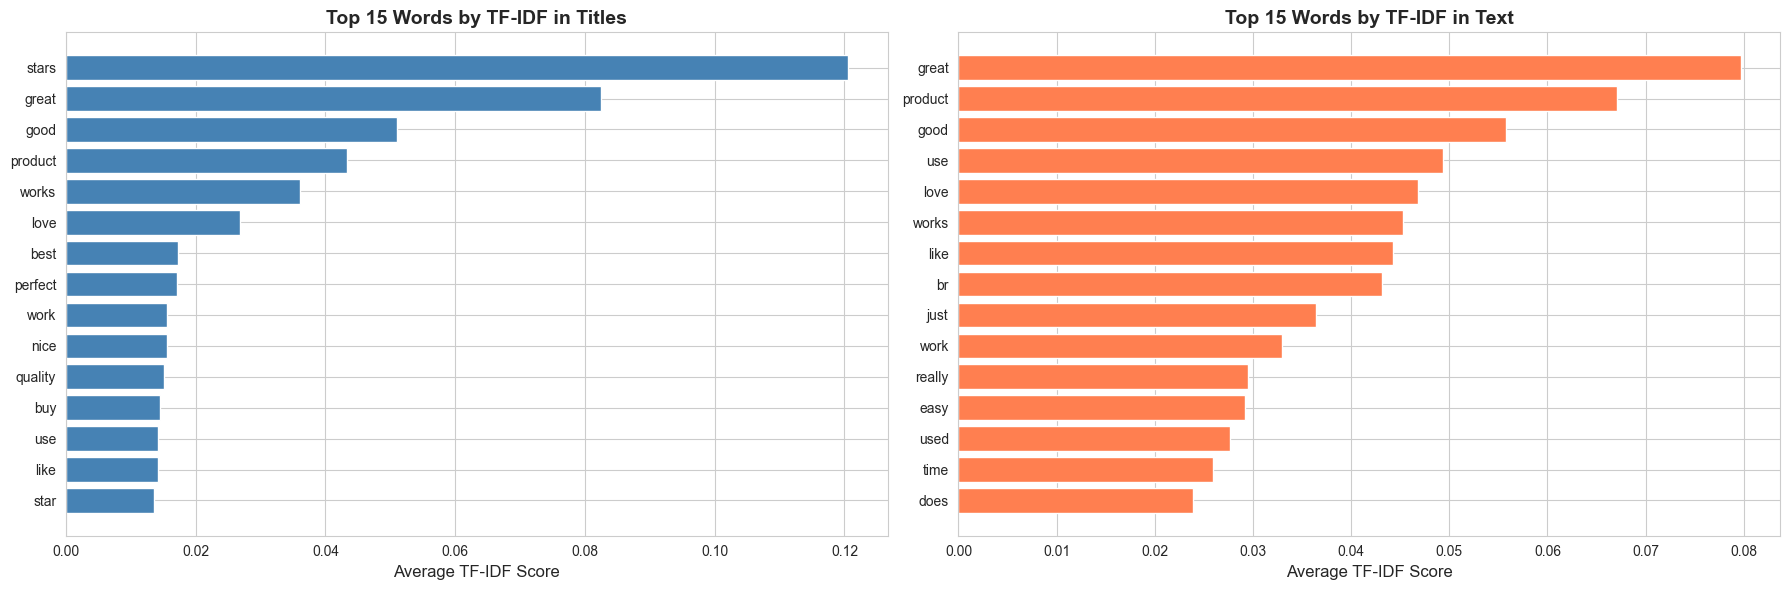

In [25]:
# Visualize TF-IDF scores
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Title TF-IDF
top_15_title = title_tfidf_df.head(15)
axes[0].barh(range(len(top_15_title)), top_15_title['tfidf'], color='steelblue')
axes[0].set_yticks(range(len(top_15_title)))
axes[0].set_yticklabels(top_15_title['word'])
axes[0].invert_yaxis()
axes[0].set_xlabel('Average TF-IDF Score', fontsize=12)
axes[0].set_title('Top 15 Words by TF-IDF in Titles', fontsize=14, fontweight='bold')

# Text TF-IDF
top_15_text = text_tfidf_df.head(15)
axes[1].barh(range(len(top_15_text)), top_15_text['tfidf'], color='coral')
axes[1].set_yticks(range(len(top_15_text)))
axes[1].set_yticklabels(top_15_text['word'])
axes[1].invert_yaxis()
axes[1].set_xlabel('Average TF-IDF Score', fontsize=12)
axes[1].set_title('Top 15 Words by TF-IDF in Text', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 7. Part-of-Speech (POS) Tagging Analysis

In [26]:
# Sample smaller subset for POS tagging (it's computationally expensive)
pos_sample_size = min(5000, len(df_sample))
df_pos_sample = df_sample.sample(n=pos_sample_size, random_state=42)

print(f"Performing POS tagging on {pos_sample_size} reviews...")

Performing POS tagging on 5000 reviews...


In [27]:
# POS tagging for titles
def get_pos_tags(text):
    """Get POS tags for text"""
    tokens = word_tokenize(str(text).lower())
    return pos_tag(tokens)

print("POS tagging titles...")
title_pos_tags = []
for title in df_pos_sample['title']:
    title_pos_tags.extend(get_pos_tags(title))

# Count POS tags
pos_counts_title = Counter([tag for word, tag in title_pos_tags])

print("\n=== POS TAG DISTRIBUTION IN TITLES ===")
for tag, count in pos_counts_title.most_common(15):
    print(f"{tag:10s}: {count:6,}")

POS tagging titles...

=== POS TAG DISTRIBUTION IN TITLES ===
NN        :  4,965
JJ        :  3,097
.         :  1,724
NNS       :  1,699
RB        :  1,544
IN        :  1,450
DT        :  1,313
VB        :    885
CD        :    823
PRP       :    745
VBZ       :    641
CC        :    548
VBP       :    511
VBD       :    406
TO        :    322


In [28]:
# POS tagging for text (sample first 100 characters to speed up)
print("POS tagging text excerpts...")
text_pos_tags = []
for text in df_pos_sample['text']:
    # Take first 100 characters for efficiency
    text_excerpt = str(text)[:100]
    text_pos_tags.extend(get_pos_tags(text_excerpt))

# Count POS tags
pos_counts_text = Counter([tag for word, tag in text_pos_tags])

print("\n=== POS TAG DISTRIBUTION IN TEXT ===")
for tag, count in pos_counts_text.most_common(15):
    print(f"{tag:10s}: {count:6,}")

POS tagging text excerpts...

=== POS TAG DISTRIBUTION IN TEXT ===
NN        : 14,511
JJ        :  7,710
DT        :  7,059
IN        :  6,614
RB        :  5,530
.         :  5,173
PRP       :  3,609
NNS       :  3,457
VB        :  3,380
VBD       :  2,947
VBZ       :  2,774
CC        :  2,736
VBP       :  2,709
TO        :  1,634
,         :  1,559


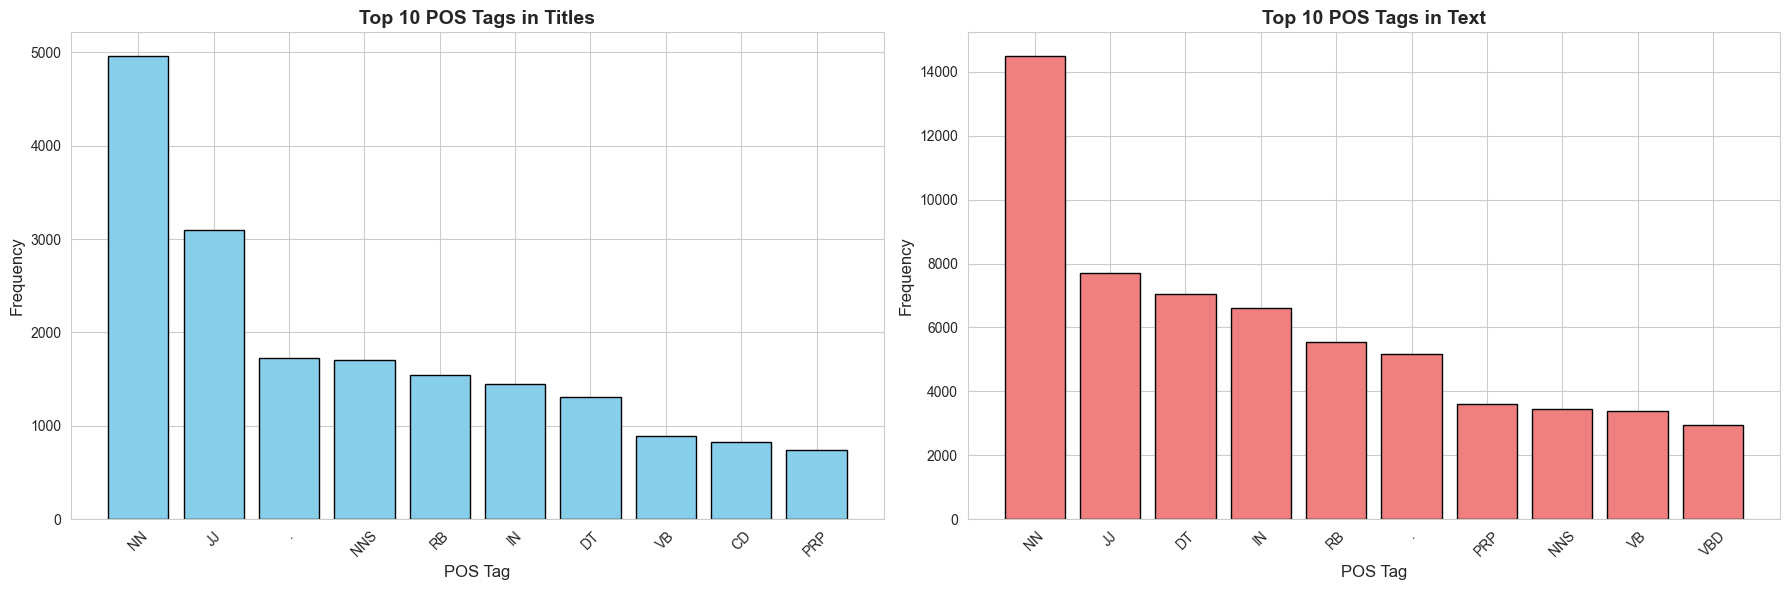

In [29]:
# Visualize POS distribution
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Title POS distribution
top_10_pos_title = pos_counts_title.most_common(10)
tags, counts = zip(*top_10_pos_title)
axes[0].bar(tags, counts, color='skyblue', edgecolor='black')
axes[0].set_xlabel('POS Tag', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Top 10 POS Tags in Titles', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

# Text POS distribution
top_10_pos_text = pos_counts_text.most_common(10)
tags, counts = zip(*top_10_pos_text)
axes[1].bar(tags, counts, color='lightcoral', edgecolor='black')
axes[1].set_xlabel('POS Tag', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Top 10 POS Tags in Text', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [30]:
# Extract most common nouns and adjectives from titles
title_nouns = [word for word, tag in title_pos_tags if tag.startswith('NN')]
title_adjectives = [word for word, tag in title_pos_tags if tag.startswith('JJ')]

print("\n=== TOP 15 NOUNS IN TITLES ===")
for word, count in Counter(title_nouns).most_common(15):
    print(f"{word:20s}: {count:6,}")

print("\n=== TOP 15 ADJECTIVES IN TITLES ===")
for word, count in Counter(title_adjectives).most_common(15):
    print(f"{word:20s}: {count:6,}")


=== TOP 15 NOUNS IN TITLES ===
stars               :    602
product             :    298
i                   :    261
works               :    150
quality             :    111
price               :     68
perfect             :     58
money               :     58
star                :     56
’                   :     51
value               :     48
t                   :     48
job                 :     40
stuff               :     36
taste               :     34

=== TOP 15 ADJECTIVES IN TITLES ===
great               :    628
good                :    366
best                :    107
nice                :    106
easy                :     98
better              :     43
i                   :     42
excellent           :     37
awesome             :     36
bad                 :     34
little              :     34
happy               :     34
perfect             :     34
small               :     33
comfortable         :     30


## 8. Readability Metrics

In [31]:
# Calculate readability scores for a subset
readability_sample_size = min(5000, len(df_sample))
df_readability = df_sample.sample(n=readability_sample_size, random_state=42)

print(f"Calculating readability metrics for {readability_sample_size} reviews...")

# Flesch Reading Ease (higher = easier to read)
df_readability['flesch_reading_ease'] = df_readability['text'].astype(str).apply(
    lambda x: textstat.flesch_reading_ease(x) if len(x) > 0 else 0
)

# Flesch-Kincaid Grade Level
df_readability['flesch_kincaid_grade'] = df_readability['text'].astype(str).apply(
    lambda x: textstat.flesch_kincaid_grade(x) if len(x) > 0 else 0
)

# Gunning Fog Index
df_readability['gunning_fog'] = df_readability['text'].astype(str).apply(
    lambda x: textstat.gunning_fog(x) if len(x) > 0 else 0
)

# SMOG Index
df_readability['smog_index'] = df_readability['text'].astype(str).apply(
    lambda x: textstat.smog_index(x) if len(x.split()) >= 30 else 0
)

print("Readability analysis complete!")

Calculating readability metrics for 5000 reviews...
Readability analysis complete!


In [32]:
# Readability statistics
print("\n=== READABILITY STATISTICS ===")
print("\nFlesch Reading Ease (0-100, higher = easier):")
print(df_readability['flesch_reading_ease'].describe())
print("\nFlesch-Kincaid Grade Level:")
print(df_readability['flesch_kincaid_grade'].describe())
print("\nGunning Fog Index:")
print(df_readability['gunning_fog'].describe())
print("\nSMOG Index:")
print(df_readability[df_readability['smog_index'] > 0]['smog_index'].describe())


=== READABILITY STATISTICS ===

Flesch Reading Ease (0-100, higher = easier):
count    5000.000000
mean       79.031750
std        22.141679
min      -132.580000
25%        70.101630
50%        79.939000
75%        90.958571
max       121.220000
Name: flesch_reading_ease, dtype: float64

Flesch-Kincaid Grade Level:
count    5000.000000
mean        4.818734
std         3.743971
min        -3.400000
25%         2.856667
50%         4.794099
75%         6.751339
max        39.816893
Name: flesch_kincaid_grade, dtype: float64

Gunning Fog Index:
count    5000.000000
mean        6.942196
std         4.596080
min         0.000000
25%         3.730000
50%         6.666667
75%         9.066667
max        43.141748
Name: gunning_fog, dtype: float64

SMOG Index:
count    1898.000000
mean        8.533731
std         2.149105
min         3.129100
25%         7.168622
50%         8.841846
75%         9.725611
max        19.287187
Name: smog_index, dtype: float64


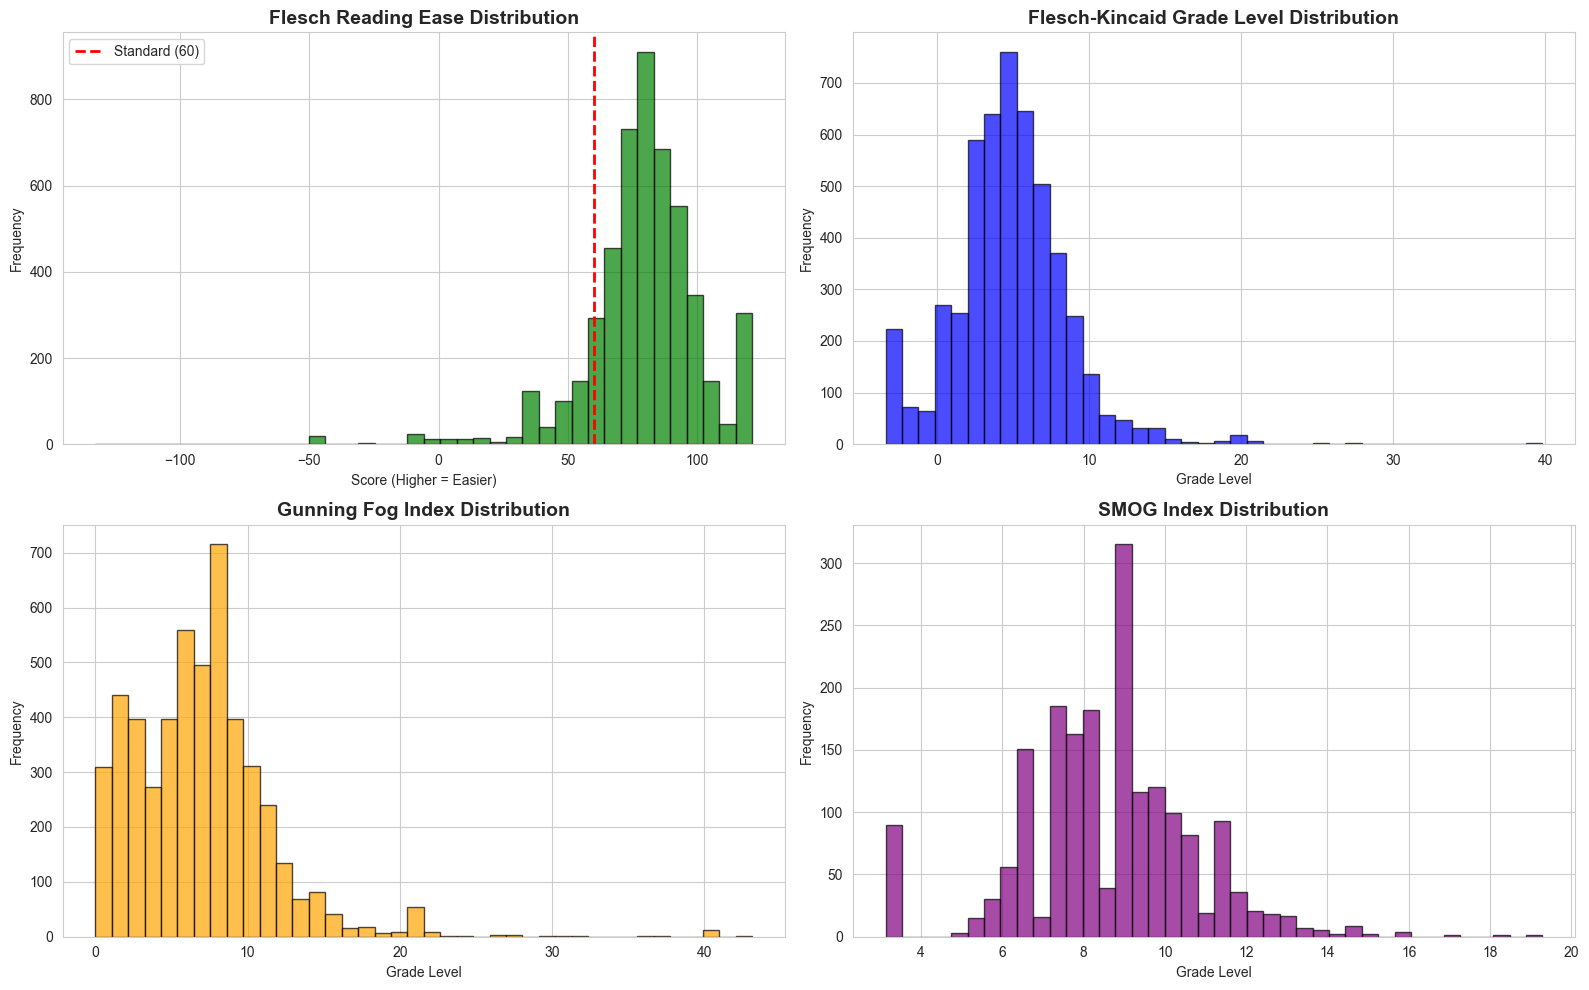

In [33]:
# Visualize readability metrics
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Flesch Reading Ease
axes[0, 0].hist(df_readability['flesch_reading_ease'], bins=40, edgecolor='black', alpha=0.7, color='green')
axes[0, 0].axvline(x=60, color='red', linestyle='--', linewidth=2, label='Standard (60)')
axes[0, 0].set_title('Flesch Reading Ease Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Score (Higher = Easier)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

# Flesch-Kincaid Grade
axes[0, 1].hist(df_readability['flesch_kincaid_grade'], bins=40, edgecolor='black', alpha=0.7, color='blue')
axes[0, 1].set_title('Flesch-Kincaid Grade Level Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Grade Level')
axes[0, 1].set_ylabel('Frequency')

# Gunning Fog
axes[1, 0].hist(df_readability['gunning_fog'], bins=40, edgecolor='black', alpha=0.7, color='orange')
axes[1, 0].set_title('Gunning Fog Index Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Grade Level')
axes[1, 0].set_ylabel('Frequency')

# SMOG Index (filter out zeros)
smog_data = df_readability[df_readability['smog_index'] > 0]['smog_index']
axes[1, 1].hist(smog_data, bins=40, edgecolor='black', alpha=0.7, color='purple')
axes[1, 1].set_title('SMOG Index Distribution', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Grade Level')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

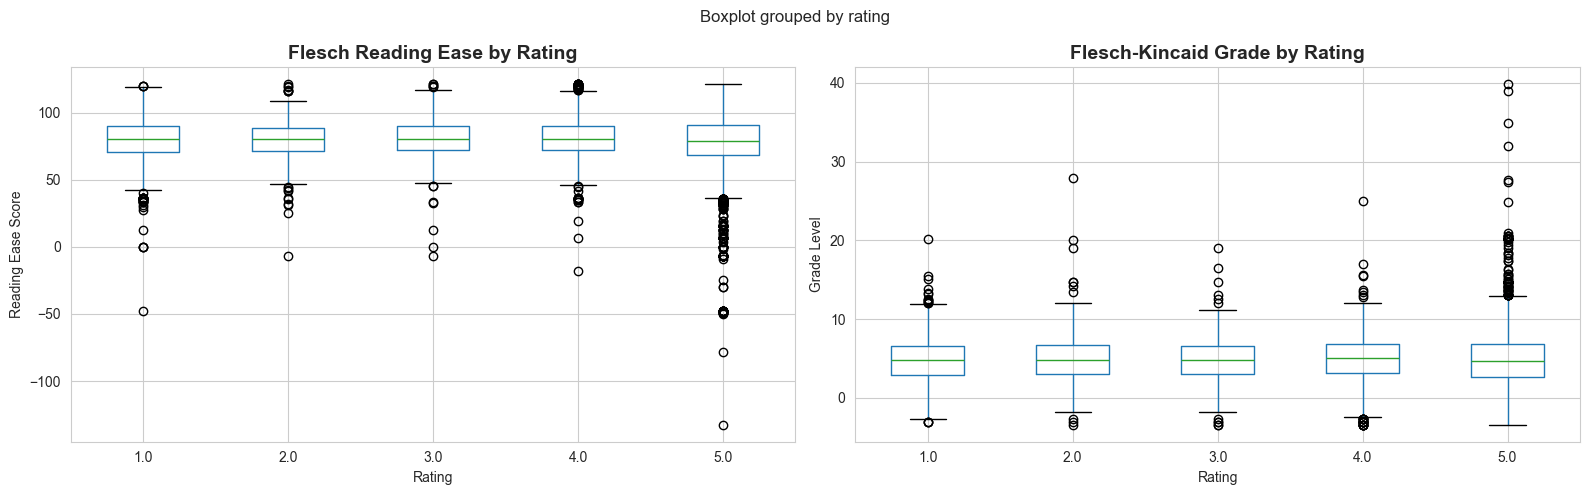

In [34]:
# Readability by rating
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

df_readability.boxplot(column='flesch_reading_ease', by='rating', ax=axes[0])
axes[0].set_title('Flesch Reading Ease by Rating', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Reading Ease Score')

df_readability.boxplot(column='flesch_kincaid_grade', by='rating', ax=axes[1])
axes[1].set_title('Flesch-Kincaid Grade by Rating', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Grade Level')

plt.tight_layout()
plt.show()

## 9. Summary and Key Insights

In [35]:
print("="*80)
print("NLP ANALYSIS SUMMARY")
print("="*80)

print("\n1. TEXT LENGTH INSIGHTS:")
print(f"   - Average title length: {df['title_length'].mean():.1f} characters")
print(f"   - Average text length: {df['text_length'].mean():.1f} characters")
print(f"   - Average words per title: {df['title_word_count'].mean():.1f}")
print(f"   - Average words per review: {df['text_word_count'].mean():.1f}")

print("\n2. VOCABULARY INSIGHTS:")
print(f"   - Total unique words in titles: {len(set(all_title_tokens)):,}")
print(f"   - Total unique words in reviews: {len(set(all_text_tokens)):,}")
print(f"   - Most common title word: '{title_word_freq.most_common(1)[0][0]}'")
print(f"   - Most common review word: '{text_word_freq.most_common(1)[0][0]}'")

print("\n3. SENTIMENT INSIGHTS:")
print(f"   - Average title sentiment: {df_sample['title_sentiment'].mean():.3f}")
print(f"   - Average text sentiment: {df_sample['text_sentiment'].mean():.3f}")
print(f"   - Correlation (title sentiment vs rating): {corr_title:.3f}")
print(f"   - Correlation (text sentiment vs rating): {corr_text:.3f}")

print("\n4. READABILITY INSIGHTS:")
print(f"   - Average Flesch Reading Ease: {df_readability['flesch_reading_ease'].mean():.1f}")
print(f"   - Average Grade Level (FK): {df_readability['flesch_kincaid_grade'].mean():.1f}")
print(f"   - Most reviews are written at a {df_readability['flesch_kincaid_grade'].median():.0f}th grade level")

print("\n5. TOP THEMES (from bigrams):")
top_5_bigrams = title_bigram_freq.most_common(5)
for i, (bigram, count) in enumerate(top_5_bigrams, 1):
    print(f"   {i}. '{' '.join(bigram)}'")

print("\n" + "="*80)

NLP ANALYSIS SUMMARY

1. TEXT LENGTH INSIGHTS:
   - Average title length: 22.4 characters
   - Average text length: 188.2 characters
   - Average words per title: 4.1
   - Average words per review: 35.2

2. VOCABULARY INSIGHTS:
   - Total unique words in titles: 11,254
   - Total unique words in reviews: 37,366
   - Most common title word: 'great'
   - Most common review word: 'product'

3. SENTIMENT INSIGHTS:
   - Average title sentiment: 0.257
   - Average text sentiment: 0.258
   - Correlation (title sentiment vs rating): 0.437
   - Correlation (text sentiment vs rating): 0.476

4. READABILITY INSIGHTS:
   - Average Flesch Reading Ease: 79.0
   - Average Grade Level (FK): 4.8
   - Most reviews are written at a 5th grade level

5. TOP THEMES (from bigrams):
   1. 'five stars'
   2. 'great product'
   3. 'four stars'
   4. 'one star'
   5. 'works great'

